#UIT-VSFC

##Preparing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install vncorenlp
!pip install transformers
!pip install SentencePiece
!pip install pyvi
!pip install transformers[torch]
!pip install accelerate -U

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%cd "/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Dataset/UIT-VSFC"

/content/drive/.shortcut-targets-by-id/1xclbjHHK58zk2X6iqbvMPS2rcy9y9E0X/UIT-VSFC


In [ ]:
%cd "/content/drive/MyDrive/MT/UIT-VSFC"

/content/drive/.shortcut-targets-by-id/1xclbjHHK58zk2X6iqbvMPS2rcy9y9E0X/UIT-VSFC


In [5]:
X_train = pd.read_csv("train/sents.txt", sep="\t", header = None)
y_train = pd.read_csv("train/sentiments.txt", sep="\t", header = None).values

In [6]:
X_test = pd.read_csv("test/sents.txt", sep="\t",header = None)
y_test = pd.read_csv("test/sentiments.txt", sep="\t", header = None).values

In [7]:
X_dev = pd.read_csv("dev/sents.txt", sep="\t", header = None)
y_dev = pd.read_csv("dev/sentiments.txt", sep="\t",header = None).values

In [ ]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([5325,  458, 5643]))

In [ ]:
X_train

,0
0,slide giáo trình đầy đủ .
1,"nhiệt tình giảng dạy , gần gũi với sinh viên ."
2,đi học đầy đủ full điểm chuyên cần .
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng..."
...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...
11422,em cảm ơn cô nhiều .
11423,giao bài tập quá nhiều .
11424,"giáo viên dạy dễ hiểu , nhiệt tình ."


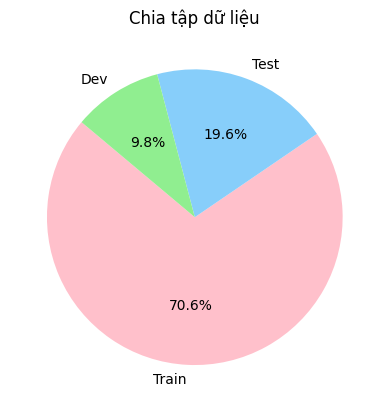

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu mẫu
labels = ['Train', 'Test', 'Dev']
sizes = [len(X_train), len(X_test), len(X_dev)]
colors = ['pink', 'lightskyblue', 'lightgreen']

# Vẽ biểu đồ tròn
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Thêm tiêu đề
plt.title('Chia tập dữ liệu')

# Hiển thị biểu đồ
plt.show()

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_dev))

11426
3166
1583


In [ ]:
# Đảm bảo y_train và y_test là mảng một chiều
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

<ipython-input-28-25d50e21fe7e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train_data_visualize, palette='viridis', ax=axes[0], order=[0, 1, 2])
<ipython-input-28-25d50e21fe7e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['negative', 'neutral', 'positive'])
<ipython-input-28-25d50e21fe7e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=test_data_visualize, palette='viridis', ax=axes[1], order=[0, 1, 2])
<ipython-input-28-25d50e21fe7e>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['negative', 'neutral', 'positive'])


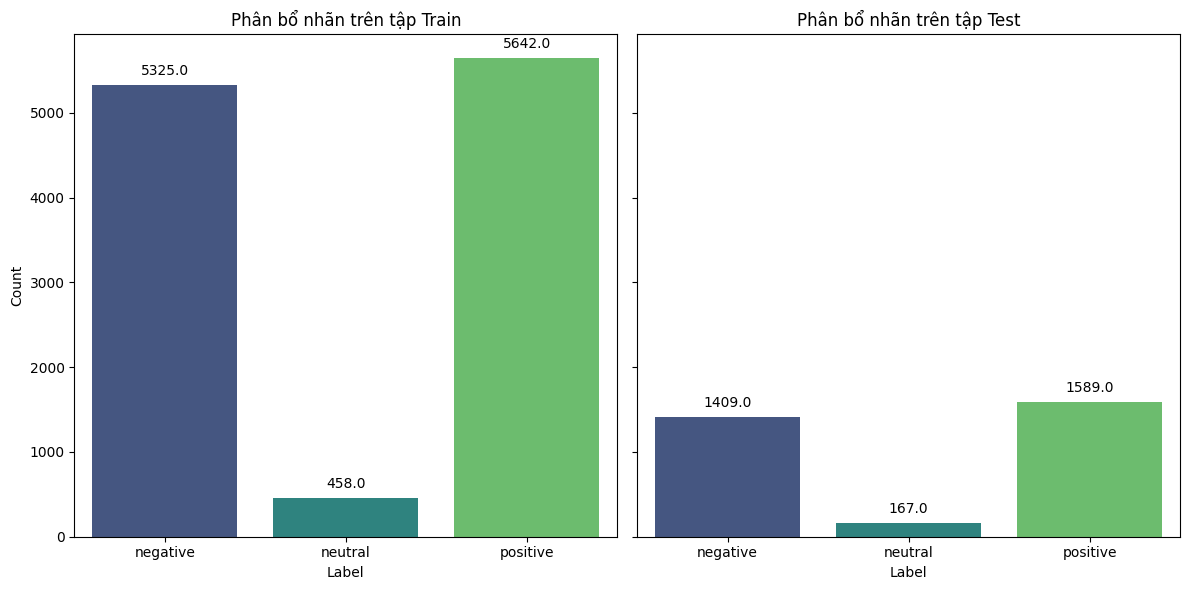

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame từ tập train và tập test để thuận tiện cho việc visualize
train_data_visualize = pd.DataFrame({'Label': y_train, 'Dataset': 'Train'})
test_data_visualize = pd.DataFrame({'Label': y_test, 'Dataset': 'Test'})

# Sử dụng seaborn để vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Biểu đồ cho tập train
sns.countplot(x='Label', data=train_data_visualize, palette='viridis', ax=axes[0], order=[0, 1, 2])
axes[0].set_title('Phân bổ nhãn trên tập Train')
axes[0].set_xlabel('Label')
axes[0].set_xticklabels(['negative', 'neutral', 'positive'])
axes[0].set_ylabel('Count')

# Thêm ô chú thích
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Biểu đồ cho tập test
sns.countplot(x='Label', data=test_data_visualize, palette='viridis', ax=axes[1], order=[0, 1, 2])
axes[1].set_title('Phân bổ nhãn trên tập Test')
axes[1].set_xlabel('Label')
axes[1].set_xticklabels(['negative', 'neutral', 'positive'])
axes[1].set_ylabel('Count')

# Thêm ô chú thích
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

##Preprocess
Loại bỏ Stop word => Các ký tự đặc biệt => Tách từ => Chuyển chữ thường

In [ ]:
%cd /content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code

/content/drive/.shortcut-targets-by-id/1iye8gG3j8-F2T4e_1f8-r47TWmUsVfYz/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1xclbjHHK58zk2X6iqbvMPS2rcy9y9E0X/UIT-VSFC


In [8]:
%cd /content

/content


In [9]:
!mkdir VNCORENLP
%cd VNCORENLP
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.2.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.2.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter

/content/VNCORENLP
--2024-05-29 16:00:58--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.2.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412703 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.2.jar’

VnCoreNLP-1.2.jar   100%[===================>]  26.14M   137MB/s    in 0.2s    

2024-05-29 16:00:59 (137 MB/s) - ‘VnCoreNLP-1.2.jar’ saved [27412703/27412703]

--2024-05-29 16:00:59--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

In [10]:
# %cd /content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/VNCORENLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("/content/VNCORENLP/vncorenlp/VnCoreNLP-1.2.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [12]:
import re
# Đọc stopwords từ tệp
STOPWORDS = '/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/vietnamese-stopwords-dash.txt'
# STOPWORDS = '/content/drive/MyDrive/MT/vietnamese-stopwords-dash.txt'
# Đọc danh sách stopwords từ file
with open(STOPWORDS, "r") as ins:
    stopword = [line.strip('\n') for line in ins]

# xóa đi các dấu cách thừa, các từ không cần thiết
def normalize_text(text):
    text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# tách từ tiếng Việt
def tokenize_text(text):
    return vncorenlp.tokenize(text)

# lọc bỏ stopwords
def remove_stopwords(tokens):
    tokens = [token for token in tokens if token not in stopword]
    return tokens

# đưa về chữ thường
def lower_text(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

In [13]:
stopword_count = 0

def process_sentence(sentence):
    sentence = str(sentence)
    sentence = normalize_text(sentence)

    tokens = tokenize_text(sentence)
    # print(tokens)
    tokens = lower_text(tokens[0])

    tokens_without_sw = remove_stopwords(tokens)
    return ' '.join(tokens_without_sw)

In [ ]:
def pre_process_features(X, y, lowercased=True):
    X = [process_sentence(sentence) for sentence in X.values]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

##Vectorizer
Mã hoá văn bản bằng kỹ thuật Word2Vec

In [14]:
X_train

,0
0,slide giáo trình đầy đủ .
1,"nhiệt tình giảng dạy , gần gũi với sinh viên ."
2,đi học đầy đủ full điểm chuyên cần .
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng..."
...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...
11422,em cảm ơn cô nhiều .
11423,giao bài tập quá nhiều .
11424,"giáo viên dạy dễ hiểu , nhiệt tình ."


In [ ]:
process_sentence(X_train.values[0])

'slide giáo_trình đầy_đủ'

In [15]:
X_train_tokenized = [process_sentence(text) for text in X_train.values]
X_dev_tokenized = [process_sentence(text) for text in X_dev.values]
X_test_tokenized = [process_sentence(text) for text in X_test.values]

In [16]:
X_train_tokenized

['slide giáo_trình đầy_đủ',
 'nhiệt_tình giảng_dạy gần_gũi sinh_viên',
 'đi học đầy_đủ full chuyên_cần',
 'áp_dụng công_nghệ_thông_tin thiết_bị giảng_dạy',
 'thầy giảng bài_tập ví_dụ lớp',
 'giảng_viên lên_lớp tích_cực trả_lời câu sinh_viên thường_xuyên câu sinh_viên',
 'nợ môn học học_kỳ kế_tiếp',
 'thời_lượng học tiếp_thu hiệu_quả',
 'nội_dung môn_học trọng_tâm hầu_như khái_quát sinh_viên nắm nội_dung môn_học',
 'trình_bày bảng thay_vì slide',
 'thầy tận_tình đi dạy',
 'áp_lực',
 'dạy thầy wzjwz208 đi nước_ngoài giữa_chừng thầy wzjwz209 dạy thay',
 'môn_học nâng độ',
 'sinh_viên đi thăm_quan công_ty quy_mô làm_việc giúp vê ngành học',
 'hài_lòng',
 'nhiệt_tình vui_vẻ',
 'nhiệt_tình trao_đổi giúp_đỡ học_tập',
 'phong_cách giảng thầy gần_gũi sinh_viên',
 'giảng_dạy kết_hợp hoạt_động giải_trí hiệu_quả',
 'seminar sinh_viên sâu chuyên_ngành môn_học',
 'tiết học thoải_mái',
 'thầy nhiệt_tình sinh_viên',
 'giảng_dạy nhiệt_tình hướng_dẫn chi_tiết sinh_viên',
 'tiết bài_tập chữa bài_tập lớp'

In [ ]:
len(X_train_tokenized)

11426

In [17]:
from gensim.models import Word2Vec

# Thay 'sentences' bằng tập dữ liệu
model = Word2Vec(X_train_tokenized, min_count=1)

# Duyệt qua từng từ trong từ điển của mô hình
word_vectors = model.wv

# Sử dụng vector từ để vector hóa câu
def vectorize_sentence(sentence):
    word_vecs = [word_vectors[word] for word in sentence if word in word_vectors]
    return np.stack(word_vecs).mean(0)

In [ ]:
X_train_tokenized

In [ ]:
vectorize_sentence(X_train_tokenized[0])

(100,)

In [ ]:
error = []
X_train_tokenized_1 = []
train_y = []
for k,(i,j) in enumerate(zip(X_train_tokenized, y_train)):
  try:
    (vectorize_sentence(i).shape)
    X_train_tokenized_1.append(i)
    train_y.append(j)
  except:
    error.append(k)


In [ ]:
error = []
X_test_tokenized_1 = []
test_y = []
for k,(i,j) in enumerate(zip(X_test_tokenized, y_test)):
  try:
    (vectorize_sentence(i).shape)
    X_test_tokenized_1.append(i)
    test_y.append(j)
  except:
    error.append(k)

In [ ]:
error = []
X_dev_tokenized_1 = []
dev_y = []
for k,(i,j) in enumerate(zip(X_dev_tokenized, y_dev)):
  try:
    (vectorize_sentence(i).shape)
    X_dev_tokenized_1.append(i)
    dev_y.append(j)
  except:
    error.append(k)

In [ ]:
# Áp dụng cho tập dữ liệu đào tạo
X_train_vectorized = [vectorize_sentence(sentence) for sentence in X_train_tokenized_1]
X_test_vectorized = [vectorize_sentence(sentence) for sentence in X_test_tokenized_1]
X_dev_vectorized = [vectorize_sentence(sentence) for sentence in X_dev_tokenized_1]

In [ ]:
len(train_y)

11348

In [ ]:
len(X_train_vectorized)

11348

##SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_vectorized, train_y)

SVC()

In [ ]:
X_train_vectorized[1].shape

(100,)

In [ ]:
y_pred = svm_model.predict(X_test_vectorized)

In [ ]:
from sklearn import metrics
# Đánh giá mô hình sử dụng các độ đo
accuracy = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average='macro')
recall = metrics.recall_score(test_y, y_pred, average='macro')
f1_score = metrics.f1_score(test_y, y_pred, average='macro')

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7342457033736474
Precision: 0.756868352553265
Recall: 0.5242956870947286
F1 Score: 0.5178943412352871


Sử dụng ma trận nhầm lẫn (confusion matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, y_pred)

Trực quan hoá ma trận nhầm lẫn bằng thư viện seaborn

In [ ]:
import seaborn as sn

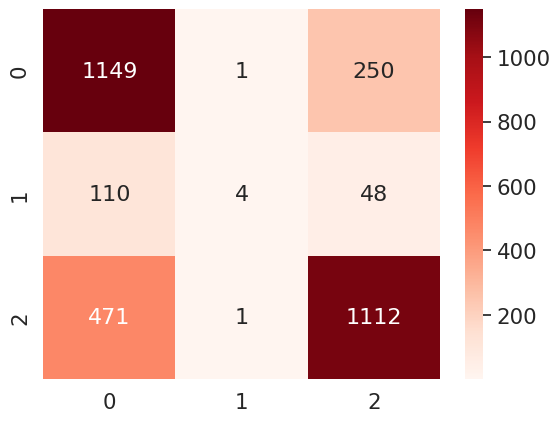

In [ ]:
import matplotlib.pyplot as plt
# Đảm bảo df_cm là một DataFrame
df_cm = pd.DataFrame(cf, range(3), range(3))
# Đặt kích thước font cho heatmap
sn.set(font_scale=1.4)
# Vẽ heatmap
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d',cmap="Reds")
# Hiển thị plot
plt.show()

**Lưu Model**

In [ ]:
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/SVM_model.joblib')

['/content/drive/MyDrive/MT/SVM_model.joblib']

##CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train_vectorized= np.array(X_train_vectorized)
train_y = np.array(train_y)
train_y = train_y.reshape(-1)
X_dev_vectorized = np.array(X_dev_vectorized)
dev_y = np.array(dev_y)
dev_y = dev_y.reshape(-1)
class customdata(Dataset):
  def __init__(self, x,y):
    self.f_len = x.shape[0]
    self.feature = x
    self.label = y
  def transform(self, x):
    x = x.astype(np.float32)
    x = torch.from_numpy(x)
    return x
  def __getitem__(self, index, is_train=True):
    feature = self.feature[index,:]
    label = self.label[index]
    feature = self.transform(feature)
    return feature, label

  def __len__(self):
    return self.f_len
train_1 = customdata(X_train_vectorized,train_y)
data_loader = DataLoader(dataset = train_1, batch_size = 64, shuffle=True,num_workers=0)
test_1 = customdata(X_dev_vectorized,dev_y)
data_loader_t = DataLoader(dataset = test_1, batch_size = 1, shuffle=False,num_workers=0)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=100, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv1d(in_channels=100, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*25, 64)
        self.fc2 = nn.Linear(64, 3)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class TextCNNClassifier(nn.Module):
    def __init__(self, input_dim, num_filters, filter_sizes, output_size):
        super(TextCNNClassifier, self).__init__()
        # Adding BatchNorm for better convergence
        self.batch_norm = nn.BatchNorm1d(input_dim)

        self.num_filters = num_filters
        self.filter_sizes = filter_sizes
        self.conv_layers = nn.ModuleList([
            nn.Conv1d(in_channels=input_dim, out_channels=num_filters, kernel_size=fs)
            for fs in filter_sizes
        ])

        self.dropout = nn.Dropout(0.5)  # Increased dropout rate to prevent overfitting
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_size)

    def forward(self, x):
        # Apply BatchNorm
        x = self.batch_norm(x)

        pooled_outputs = []
        for conv_layer in self.conv_layers:
            conv_out = F.relu(conv_layer(x))
            pooled_out = F.max_pool1d(conv_out, conv_out.shape[2]).squeeze(2)
            pooled_outputs.append(pooled_out)

        # Concatenate pooled outputs and flatten
        pooled_outputs = torch.cat(pooled_outputs, dim=1)
        pooled_outputs = self.dropout(pooled_outputs)

        # Fully connected layer for classification
        logits = self.fc(pooled_outputs)
        return logits


class ImprovedTextCNNClassifier(nn.Module):
    def __init__(self, input_dim, num_filters, filter_sizes, output_size, dropout_rate=0.5):
        super(ImprovedTextCNNClassifier, self).__init__()
        self.num_filters = num_filters
        self.filter_sizes = filter_sizes

        # Convolutional layers
        self.conv_layers = nn.ModuleList([
            nn.Conv1d(in_channels=input_dim, out_channels=num_filters, kernel_size=fs)
            for fs in filter_sizes
        ])

        # LSTM layer for capturing sequential information
        self.lstm = nn.LSTM(input_dim, hidden_size=num_filters, num_layers=1, batch_first=True, bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)

        # Fully connected layer
        self.fc = nn.Linear(num_filters * len(filter_sizes) * 2, output_size)  # *2 for bidirectional LSTM

    def forward(self, x):
        # x shape should be (batch_size, seq_len, input_dim)
        x = x.transpose(1, 2)
        # Apply LSTM
        lstm_out, _ = self.lstm(x)

        # Transpose to fit Conv1d input format (batch_size, input_dim, seq_len)
        # lstm_out = lstm_out.transpose(1, 2)
        print(lstm_out.size())
        # Apply convolutional layers with different kernel sizes and max-pooling
        pooled_outputs = []
        for conv_layer in self.conv_layers:
            conv_out = F.relu(conv_layer(lstm_out))
            pooled_out = F.max_pool1d(conv_out, conv_out.shape[2]).squeeze(2)
            pooled_outputs.append(pooled_out)

        # Concatenate pooled outputs and flatten
        pooled_outputs = torch.cat(pooled_outputs, dim=1)
        pooled_outputs = self.dropout(pooled_outputs)

        # Fully connected layer for classification
        logits = self.fc(pooled_outputs)
        return logits


class LSTM_CNN_TextClassifier(nn.Module):
    def __init__(self, input_dim, lstm_hidden_dim, num_layers, num_filters, filter_sizes, output_size, dropout=0.5):
        super(LSTM_CNN_TextClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, lstm_hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.conv_layers = nn.ModuleList([
            nn.Conv1d(in_channels=2*lstm_hidden_dim, out_channels=num_filters, kernel_size=fs)
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_size)
    def forward(self, x):
        x = x.permute(0, 2, 1)
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out.permute(0, 2, 1)  # Change tensor shape to (batch, channels, seq_len)
        pooled_outputs = []
        for conv_layer in self.conv_layers:
            conv_out = F.relu(conv_layer(lstm_out))
            pooled_out = F.max_pool1d(conv_out, conv_out.shape[2]).squeeze(2)
            pooled_outputs.append(pooled_out)
        pooled_outputs = torch.cat(pooled_outputs, dim=1)
        pooled_outputs = self.dropout(pooled_outputs)
        logits = self.fc(pooled_outputs)
        return logits

# Khởi tạo mô hình, hàm loss và optimizer

input_dim = 1
num_filters = 100
filter_sizes = [2, 3, 4]
output_size = 3


model = SimpleCNN()
# model = TextCNNClassifier(input_dim, num_filters, filter_sizes, output_size)
# model = ImprovedTextCNNClassifier(input_dim, num_filters, filter_sizes, output_size)
# model = LSTM_CNN_TextClassifier(input_dim=input_dim, lstm_hidden_dim=128, num_layers=2, num_filters=num_filters, filter_sizes=filter_sizes, output_size=output_size)

model = model.to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
# optimizer = torch.optim.SGD(model.parameters(), lr=5e-4, momentum=0.9)
# Huấn luyện mô hình
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    for inputs, targets in data_loader:
        inputs = inputs.to('cuda')
        inputs= torch.unsqueeze(inputs, 1)
        targets = targets.to(torch.long).to('cuda')

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == targets.data)
    epoch_loss = running_loss / len(train_1)
    epoch_acc = running_corrects.double() / len(train_1)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, acc: {epoch_acc*100:.2f}', end = ' | val:')
    running_loss1 = 0.0
    running_corrects1 = 0.0
    with torch.no_grad():
      for inputs, targets in data_loader_t:
          inputs = inputs.to('cuda')
          inputs= torch.unsqueeze(inputs, 1)
          targets = targets.to(torch.long).to('cuda')

          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, targets)
          running_loss1 += loss.item() * inputs.size(0)
          running_corrects1 += torch.sum(preds == targets.data)
    epoch_loss1 = running_loss1 / len(test_1)
    epoch_acc1 = running_corrects1.double() / len(test_1)
    print(f'Loss: {epoch_loss1:.4f}, acc: {epoch_acc1*100:.2f}')

Epoch [1/100], Loss: 0.8101, acc: 61.18 | val:Loss: 0.7499, acc: 65.28
Epoch [2/100], Loss: 0.7066, acc: 68.69 | val:Loss: 0.7146, acc: 66.75
Epoch [3/100], Loss: 0.6835, acc: 69.50 | val:Loss: 0.7029, acc: 67.78
Epoch [4/100], Loss: 0.6713, acc: 69.84 | val:Loss: 0.6949, acc: 68.48
Epoch [5/100], Loss: 0.6567, acc: 70.25 | val:Loss: 0.6863, acc: 67.97
Epoch [6/100], Loss: 0.6438, acc: 71.07 | val:Loss: 0.6677, acc: 68.87
Epoch [7/100], Loss: 0.6378, acc: 71.48 | val:Loss: 0.6615, acc: 69.44
Epoch [8/100], Loss: 0.6286, acc: 72.10 | val:Loss: 0.6567, acc: 69.51
Epoch [9/100], Loss: 0.6256, acc: 72.02 | val:Loss: 0.6736, acc: 69.06
Epoch [10/100], Loss: 0.6197, acc: 72.71 | val:Loss: 0.6560, acc: 69.89
Epoch [11/100], Loss: 0.6157, acc: 72.50 | val:Loss: 0.6425, acc: 70.21
Epoch [12/100], Loss: 0.6137, acc: 72.93 | val:Loss: 0.6399, acc: 70.98
Epoch [13/100], Loss: 0.6084, acc: 73.22 | val:Loss: 0.6469, acc: 71.11
Epoch [14/100], Loss: 0.6047, acc: 73.42 | val:Loss: 0.6330, acc: 70.53
E

Confusion matrix, without normalization
[[1155    2  242]
 [ 106    8   46]
 [ 413    7 1163]]
Normalized confusion matrix
[[0.82558971 0.00142959 0.1729807 ]
 [0.6625     0.05       0.2875    ]
 [0.26089703 0.00442198 0.73468099]]


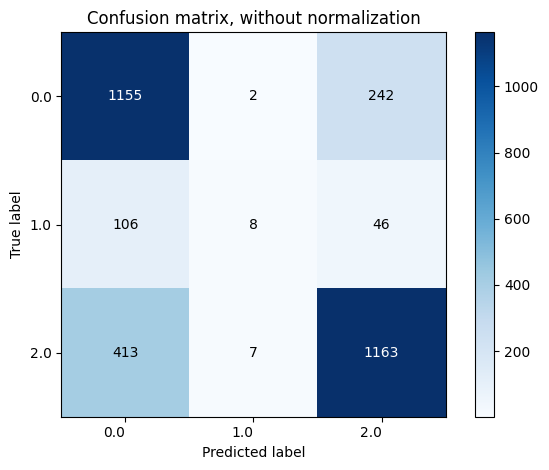

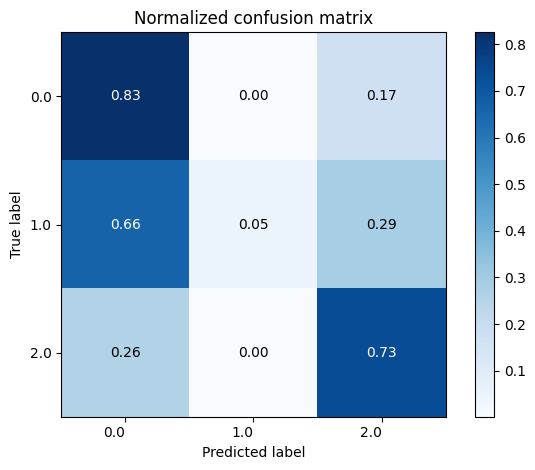

Accuracy: 0.7402928071292171
Precision: 0.6540228629090986
Recall: 0.5367568974680498
F1 Score: 0.536249533981988


In [ ]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'


    cm = confusion_matrix(y_true, y_pred)

    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    # if normalize:
    #         plt.savefig(join(join('/content/drive/MyDrive/Anh Long/Efficient Net B3/Weight class cross entropy loss',name_folder),'schedule_evalution_N.png'))
    # else:
    #         plt.savefig(join(join('/content/drive/MyDrive/Anh Long/Efficient Net B3/Weight class cross entropy loss',name_folder),'schedule_evalution.png'))

    return ax

def report(Y_TRUE,y_pred):

    plot_confusion_matrix(Y_TRUE, y_pred, classes=['a','b'],
                        title='Confusion matrix, without normalization')


    plot_confusion_matrix(Y_TRUE, y_pred, classes=['a','b'], normalize=True,
                        title='Normalized confusion matrix')
    plt.show()

    accuracy = metrics.accuracy_score(Y_TRUE, y_pred)
    precision = metrics.precision_score(Y_TRUE, y_pred, average='macro')
    recall = metrics.recall_score(Y_TRUE, y_pred, average='macro')
    f1_score = metrics.f1_score(Y_TRUE, y_pred, average='macro')

    # In kết quả
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")

X_test_vectorized = np.array(X_test_vectorized)
test_y = np.array(test_y).reshape(-1)
test_2 = customdata(X_test_vectorized,test_y)
data_loader_2 = DataLoader(dataset = test_2, batch_size = 1, shuffle=False,num_workers=0)


y_pred = torch.tensor([]).to('cuda')
Y_TRUE = torch.tensor([]).to('cuda')
with torch.no_grad():
  for inputs, labels in data_loader_2:
    inputs = inputs.to('cuda')
    labels = labels.to('cuda')
    inputs= torch.unsqueeze(inputs, 1)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    Y_TRUE = torch.cat((Y_TRUE,labels),dim=0)
    y_pred = torch.cat((y_pred,preds),dim=0)
Y_TRUE = Y_TRUE.tolist()
y_pred = y_pred.tolist()
report(Y_TRUE,y_pred)

**Lưu Model**

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/CNN_model.pth')

##PhoBert

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is

Step,Training Loss
500,0.722600
1000,0.584900
1500,0.543200
2000,0.472200
2500,0.471600
3000,0.479400
3500,0.409600
4000,0.415700


[[1174    2  233]
 [ 102   15   50]
 [ 204    6 1380]]
F1 - micro: 0.8114339861023373
F1 - macro: 0.6063600984338319


<Axes: >

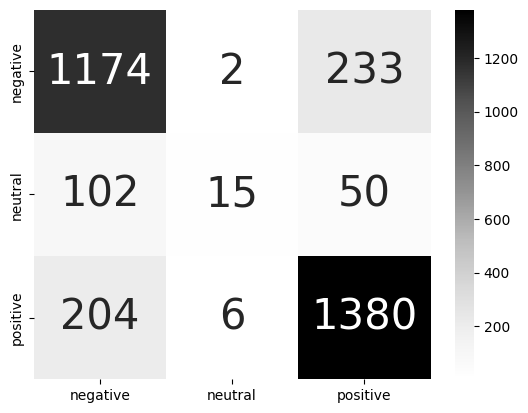

In [ ]:
# PhoBERT
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

train_X, train_y = pre_process_features(X_train, y_train, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, lowercased = False)

model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)

# Training parameters
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/phobert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/phobert/phobert.pth")

y_pred_classify = trainer.predict(test_dataset)


y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
# print(cf1)

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred, average='macro')
recall = metrics.recall_score(y_true, y_pred, average='macro')
f1_score = metrics.f1_score(y_true, y_pred, average='macro')

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

# Show out the confusion matrix
df_cm1 = pd.DataFrame(cf1, index = ['negative', 'neutral', 'positive'],
                  columns = ['negative', 'neutral', 'positive'])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

##VisoBert

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/471k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/390M [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at uitnlp/visobert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.632200
1000,0.573700
1500,0.537500
2000,0.465900
2500,0.468100
3000,0.466100
3500,0.372600
4000,0.372100


Accuracy: 0.7905874921036008
Precision: 0.6640160824583087
Recall: 0.600125094072248
F1 Score: 0.6132882469052844


<Axes: >

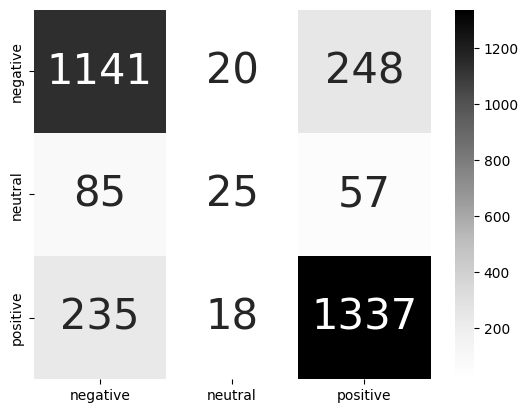

In [ ]:
# VisoBert
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from transformers import AutoModel, AutoTokenizer, AutoConfig
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# train_X, train_y = pre_process_features(X_train, y_train, lowercased = False)
# dev_X, dev_y = pre_process_features(X_dev, y_dev, lowercased = False)
# test_X, test_y = pre_process_features(X_test, y_test, lowercased = False)


tokenizer = AutoTokenizer.from_pretrained('uitnlp/visobert')
model = AutoModelForSequenceClassification.from_pretrained('uitnlp/visobert', num_labels=3)
import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)



# Training parameters
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/visobert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    compute_metrics=lambda p: {"accuracy": (p.predictions.argmax(axis=1) == p.label_ids).mean()},
)


trainer.train()
trainer.save_model("/content/drive/MyDrive/SCHOOL/YEAR3/HK2/IE403_KTDLTT/IE403.O22 Khai thác dữ liệu truyền thông xã hội/Code/Model/UIT_VSFC/visobert")

y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
# print(cf1)

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred, average='macro')
recall = metrics.recall_score(y_true, y_pred, average='macro')
f1_score = metrics.f1_score(y_true, y_pred, average='macro')

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
# Show out the confusion matrix
df_cm1 = pd.DataFrame(cf1, index = ['negative', 'neutral', 'positive'],
                  columns = ['negative', 'neutral', 'positive'])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

##CafeBert

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at uitnlp/CafeBERT and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.648800
1000,0.557500


Accuracy: 0.7943777637397347
Precision: 0.8251517886844808
Recall: 0.5731074776141037
F1 Score: 0.5727914493879597


<Axes: >

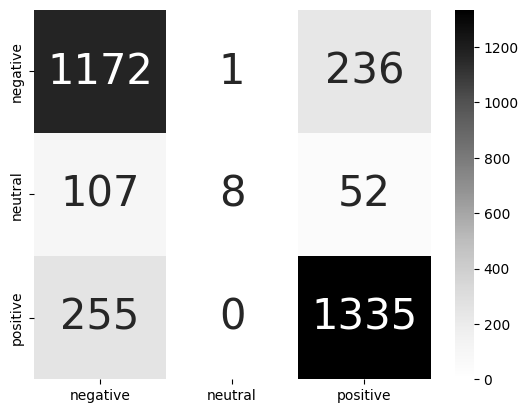

In [ ]:
# CafeBERT
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

train_X, train_y = pre_process_features(X_train, y_train, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, lowercased = False)

model = AutoModelForSequenceClassification.from_pretrained("uitnlp/CafeBERT", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("uitnlp/CafeBERT",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/MT/cafebert',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    no_cuda=False,
    do_eval=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/MT/cafebert")

y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
# print(cf1)

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred, average='macro')
recall = metrics.recall_score(y_true, y_pred, average='macro')
f1_score = metrics.f1_score(y_true, y_pred, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

df_cm1 = pd.DataFrame(cf1, index = ['negative', 'neutral', 'positive'],
                  columns = ['negative', 'neutral', 'positive'])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})